### Import necessary liabraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Load the data set

In [2]:
df=pd.read_csv("D:\Datatrained projects\data\Evaluation data\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# checking shape of dataset
df.shape

(614, 13)

In [4]:
# checking columns of dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# checking info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# statistical summary of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Observations from data:
1. Data have both continuous and classification data.
2. there are null values present in data.
3. columns coapplication income has min and 25% data as zero and there is variation in 50,70,max data indicates outliers.
4. column loan amount term is in days.
5. column applicant income has high variation in min,25,50,75 quantiles.

### Check null values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# total no of null values
df.isnull().sum().sum()

149

In [9]:
# replacing '0'in coapplicant income with mean
df['CoapplicantIncome']=df['CoapplicantIncome'].replace(0,df['CoapplicantIncome'].mean())

In [10]:
# Filling null values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# dropping nans in gender column
df.dropna(inplace=True)

In [13]:
# Checking null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

From above we can say that all nans are removed.

In [14]:
df.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,1621.245798,146.412162,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.000000,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,1621.245798,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,609,LP002978,Female,No,0,Graduate,No,2900,1621.245798,71.000000,360.0,1.0,Rural,Y
597,610,LP002979,Male,Yes,3+,Graduate,No,4106,1621.245798,40.000000,180.0,1.0,Rural,Y
598,611,LP002983,Male,Yes,1,Graduate,No,8072,240.000000,253.000000,360.0,1.0,Urban,Y
599,612,LP002984,Male,Yes,2,Graduate,No,7583,1621.245798,187.000000,360.0,1.0,Urban,Y


In [15]:
# dropping unnecessary columns
df.drop(columns=['Loan_ID','Dependents'],axis=1,inplace=True)

### Label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
df['Gender']=le.fit_transform(df['Gender'])

In [18]:
df['Married']=le.fit_transform(df['Married'])

In [19]:
df['Education']=le.fit_transform(df['Education'])

In [20]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [21]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [22]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

### Inbalance checking for target variable

Class 0: 187
Class 1: 414
Proportion: 0.45 :1


<AxesSubplot:title={'center':'taget (count)'}>

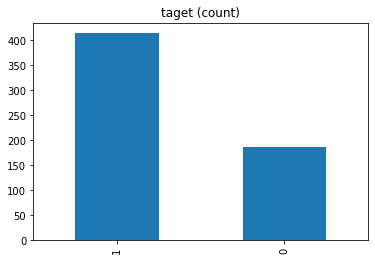

In [23]:
# Checking target variable for inbalance
label_count=df['Loan_Status'].value_counts()
print("Class 0:",label_count[0])
print("Class 1:",label_count[1])
print('Proportion:', round(label_count[0]/label_count[1],2),':1')
label_count.plot(kind='bar', title='taget (count)')

From above we can see that target is inbalanced so we have balance it using sampling techniques.

### Data Distribution

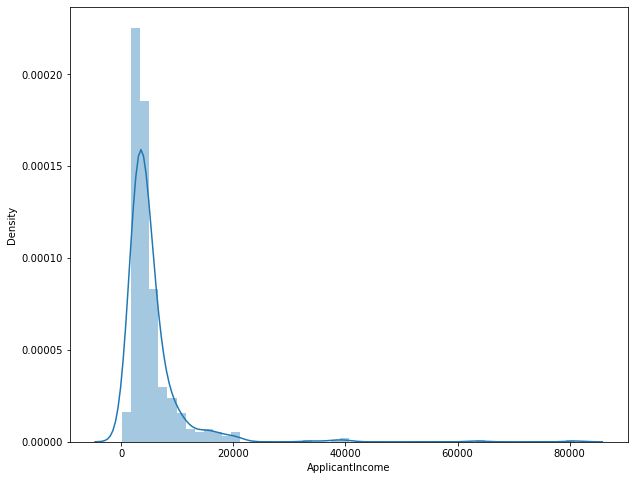

In [24]:
plt.figure(figsize=(10,8))
ax=sns.distplot(df['ApplicantIncome'],kde=True,hist=True)

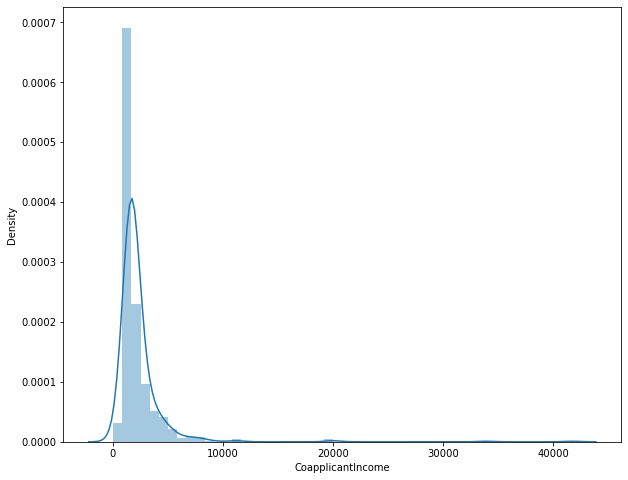

In [25]:
plt.figure(figsize=(10,8))
ax=sns.distplot(df['CoapplicantIncome'],kde=True,hist=True)

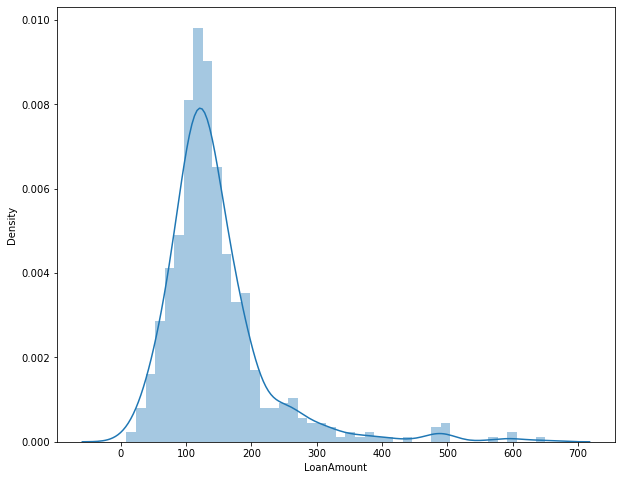

In [26]:
plt.figure(figsize=(10,8))
ax=sns.distplot(df['LoanAmount'],kde=True,hist=True)

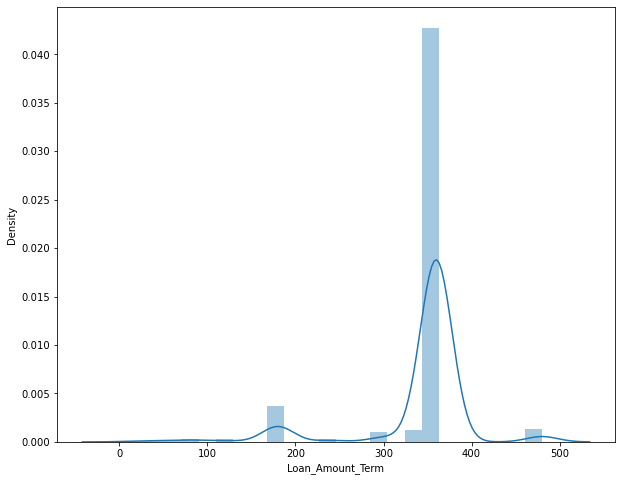

In [27]:
plt.figure(figsize=(10,8))
ax=sns.distplot(df['Loan_Amount_Term'],kde=True,hist=True)

from above distributions we can see that there is a skewness in  data so have remove it.

### Checking skewness

In [28]:
df.skew().sort_values(ascending=False)

CoapplicantIncome    9.623635
ApplicantIncome      6.956995
LoanAmount           2.579820
Self_Employed        2.208757
Education            1.346115
Property_Area       -0.070707
Married             -0.633237
Loan_Status         -0.817883
Gender              -1.614968
Credit_History      -2.043575
Loan_Amount_Term    -2.383253
dtype: float64

In [29]:
# power transform function to remove skewness
from sklearn.preprocessing import power_transform
x_new=power_transform(df)
x=pd.DataFrame(x_new,columns=df.columns)

In [30]:
# Validating the skewness
sk=df.skew()

In [31]:
sk[np.abs(sk)>0.6].all()

True

From above we can see that skewness is removed.

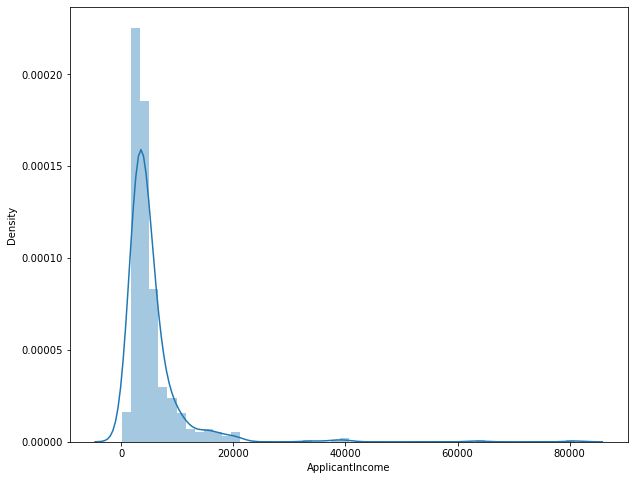

In [32]:
# Checking data distribution
plt.figure(figsize=(10,8))
ax=sns.distplot(df['ApplicantIncome'],kde=True,hist=True)

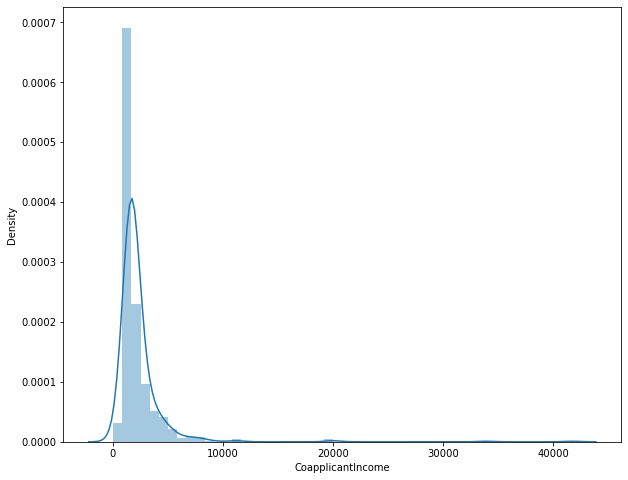

In [33]:
plt.figure(figsize=(10,8))
ax=sns.distplot(df['CoapplicantIncome'],kde=True,hist=True)

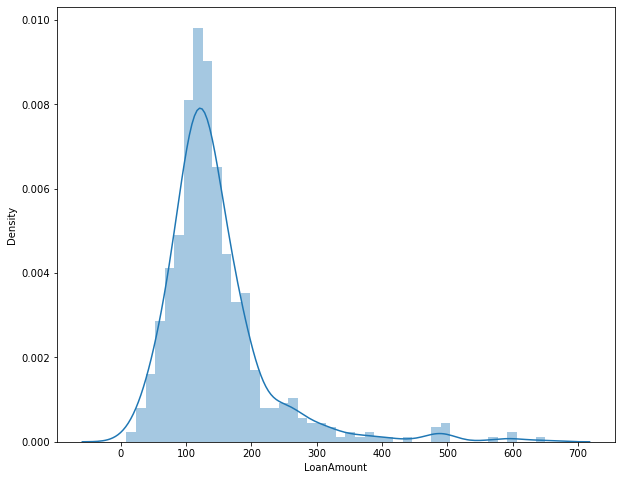

In [34]:
plt.figure(figsize=(10,8))
ax=sns.distplot(df['LoanAmount'],kde=True,hist=True)

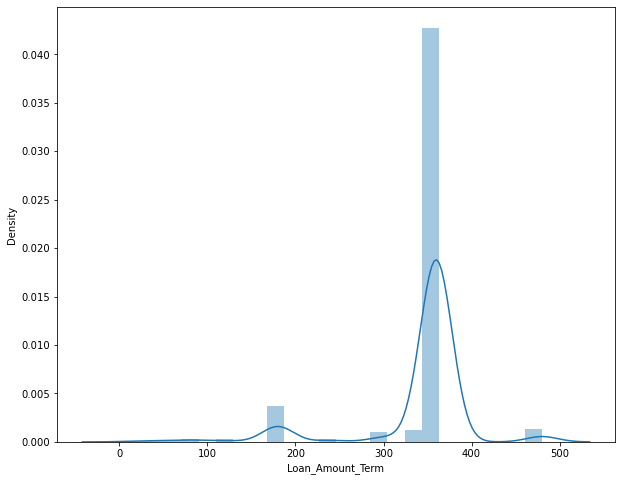

In [35]:
plt.figure(figsize=(10,8))
ax=sns.distplot(df['Loan_Amount_Term'],kde=True,hist=True)

### Checking outlier

<AxesSubplot:>

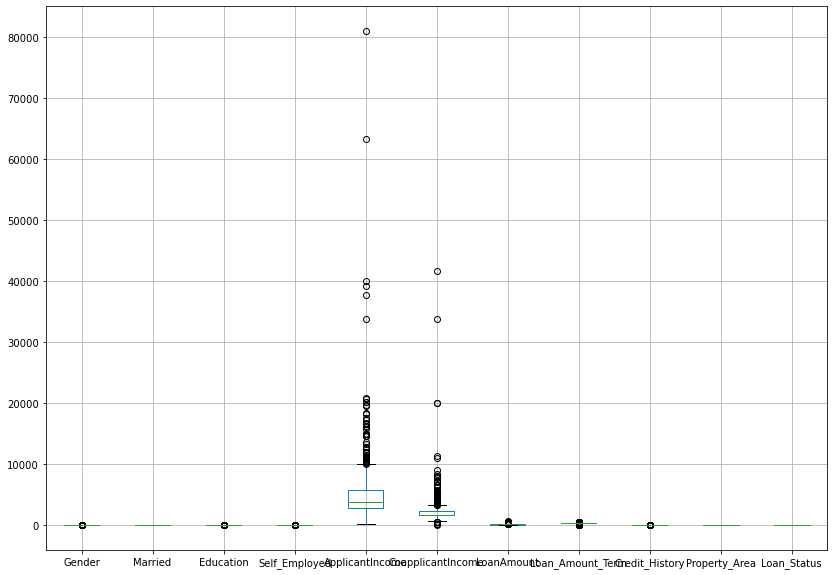

In [36]:
plt.figure(figsize=(14,10))
df.boxplot()

from above distribution we can see that outliers in data set.

In [37]:
# quantify the outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(601, 11)

In [38]:
Threshold=3
print(np.where(z<3))
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(array([  0,   0,   0, ..., 600, 600, 600], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(601, 11)
(566, 11)


### Data loss

In [39]:
Loss_percentage=((601-566)/601)*100
Loss_percentage

5.823627287853577

we can see that data loss is in range and we can afoord that much of data loss.

<AxesSubplot:>

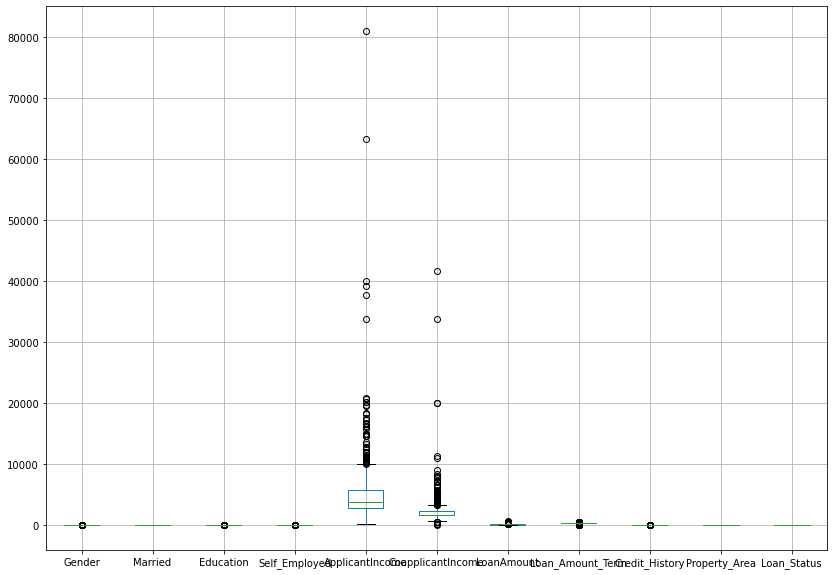

In [40]:
plt.figure(figsize=(14,10))
df.boxplot()

### Correlation using heatmap

In [41]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.366241,0.049258,-0.005903,0.053989,0.024762,0.105462,-0.074134,0.011878,-0.024556,0.019857
Married,0.366241,1.000000,0.012379,0.002644,0.042982,-0.019783,0.145310,-0.099385,0.019435,0.010569,0.095423
Education,0.049258,0.012379,1.000000,-0.003116,-0.139584,-0.088616,-0.165496,-0.079370,-0.068317,-0.062634,-0.083264
Self_Employed,-0.005903,0.002644,-0.003116,1.000000,0.145441,0.006700,0.116785,-0.026728,-0.011857,-0.032143,-0.018506
ApplicantIncome,0.053989,0.042982,-0.139584,0.145441,1.000000,-0.046077,0.524232,-0.037711,-0.033326,-0.023967,-0.024674
CoapplicantIncome,0.024762,-0.019783,-0.088616,0.006700,-0.046077,1.000000,0.219434,-0.074817,0.007071,0.030982,-0.092792
LoanAmount,0.105462,0.145310,-0.165496,0.116785,0.524232,0.219434,1.000000,0.048907,-0.011782,-0.054763,-0.054097
Loan_Amount_Term,-0.074134,-0.099385,-0.079370,-0.026728,-0.037711,-0.074817,0.048907,1.000000,0.004476,-0.070421,-0.016251
Credit_History,0.011878,0.019435,-0.068317,-0.011857,-0.033326,0.007071,-0.011782,0.004476,1.000000,-0.003412,0.536185
Property_Area,-0.024556,0.010569,-0.062634,-0.032143,-0.023967,0.030982,-0.054763,-0.070421,-0.003412,1.000000,0.029504


<AxesSubplot:>

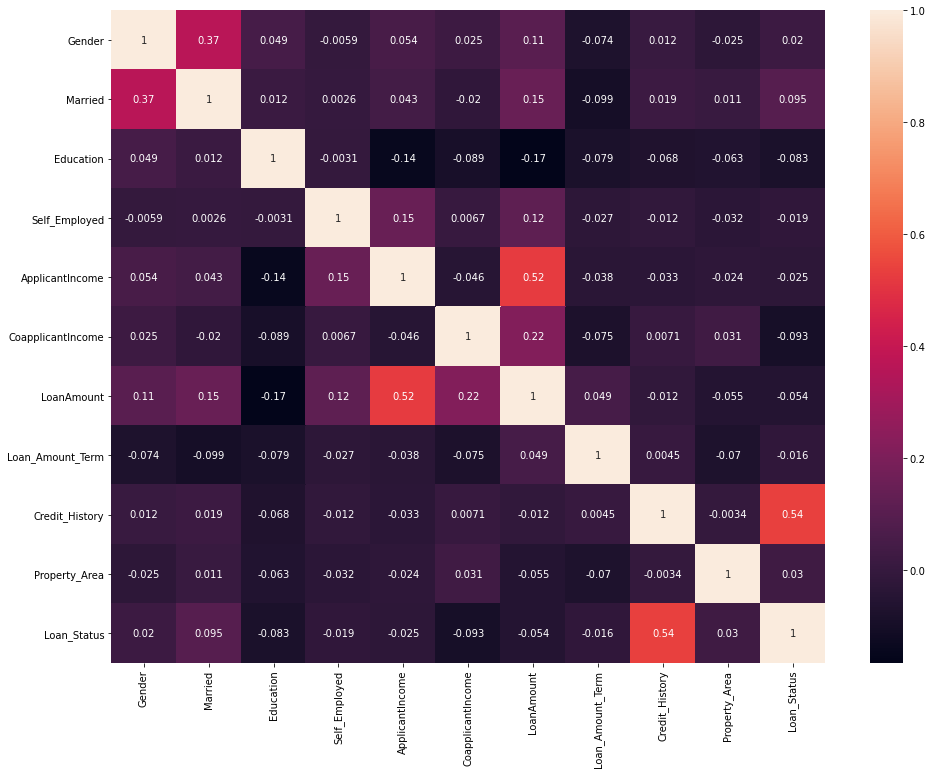

In [42]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

In [43]:
# Chacking label correlation with feature
df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.536185
Married              0.095423
Property_Area        0.029504
Gender               0.019857
Loan_Amount_Term    -0.016251
Self_Employed       -0.018506
ApplicantIncome     -0.024674
LoanAmount          -0.054097
Education           -0.083264
CoapplicantIncome   -0.092792
Name: Loan_Status, dtype: float64

### Splitting data into feature and label

In [44]:
x=df.drop(columns=['Loan_Status'], axis=1)
y=df['Loan_Status']

### Data scaling

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.47858004, -1.36451631, -0.53309289, ...,  0.27845443,
         0.40864446,  1.21859656],
       [ 0.47858004,  0.73286042, -0.53309289, ...,  0.27845443,
         0.40864446, -1.31997027],
       [ 0.47858004,  0.73286042, -0.53309289, ...,  0.27845443,
         0.40864446,  1.21859656],
       ...,
       [ 0.47858004,  0.73286042, -0.53309289, ...,  0.27845443,
         0.40864446,  1.21859656],
       [ 0.47858004,  0.73286042, -0.53309289, ...,  0.27845443,
         0.40864446,  1.21859656],
       [-2.08951464, -1.36451631, -0.53309289, ...,  0.27845443,
        -2.44711506, -0.05068686]])

### splitting data in  train test 

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1245,test_size=0.3)

In [48]:
# smote technique
from imblearn.over_sampling import SMOTE
sm=SMOTE()
over_sampling=SMOTE(0.75)

In [53]:
from collections import Counter
x_train_sm,y_train_sm=over_sampling.fit_resample(x_train,y_train)
print("The no. of classes before fit{}".format(Counter(y_train)))
print("The no. of classes after fit{}".format(Counter(y_train_ns)))

The no. of classes before fitCounter({1: 289, 0: 131})
The no. of classes after fitCounter({1: 289, 0: 216})


### Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sm,y_train_sm)
predlr=lr.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy:",accuracy_score(y_test,predlr))
print("classification report:",classification_report(y_test,predlr))
print("confusion matrix:",confusion_matrix(y_test,predlr))

Accuracy: 0.7679558011049724
classification report:               precision    recall  f1-score   support

           0       0.75      0.38      0.50        56
           1       0.77      0.94      0.85       125

    accuracy                           0.77       181
   macro avg       0.76      0.66      0.67       181
weighted avg       0.76      0.77      0.74       181

confusion matrix: [[ 21  35]
 [  7 118]]


### Decision tree classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_sm,y_train_sm)
preddt=dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddt))
print("classification report:",classification_report(y_test,preddt))
print("confusion matrix:",confusion_matrix(y_test,preddt))

Accuracy: 0.6850828729281768
classification report:               precision    recall  f1-score   support

           0       0.49      0.45      0.47        56
           1       0.76      0.79      0.78       125

    accuracy                           0.69       181
   macro avg       0.63      0.62      0.62       181
weighted avg       0.68      0.69      0.68       181

confusion matrix: [[25 31]
 [26 99]]


### Random forest classifier 

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_sm,y_train_sm)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Classification report:",classification_report(y_test,predrf))
print("confusion matrix:",confusion_matrix(y_test,predrf))

Accuracy: 0.712707182320442
Classification report:               precision    recall  f1-score   support

           0       0.55      0.43      0.48        56
           1       0.77      0.84      0.80       125

    accuracy                           0.71       181
   macro avg       0.66      0.63      0.64       181
weighted avg       0.70      0.71      0.70       181

confusion matrix: [[ 24  32]
 [ 20 105]]


### KNN 

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_sm,y_train_sm)
predknn=knn.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predknn))
print("confusion matrix:",confusion_matrix(y_test,predknn))
print("classification report:",classification_report(y_test,predknn))

Accuracy: 0.6906077348066298
confusion matrix: [[ 20  36]
 [ 20 105]]
classification report:               precision    recall  f1-score   support

           0       0.50      0.36      0.42        56
           1       0.74      0.84      0.79       125

    accuracy                           0.69       181
   macro avg       0.62      0.60      0.60       181
weighted avg       0.67      0.69      0.67       181



### Cross validation for overfitting

1.Logistic regression

In [58]:
from sklearn.model_selection import cross_val_score
cvs1=cross_val_score(lr,x,y,cv=5)
print(cvs1.mean())

0.8069834710743802


2.Decision tree classifier

In [59]:
cvs2=cross_val_score(dt,x,y,cv=5)
print(cvs2.mean())

0.6988429752066116


3.Random forest classifier

In [60]:
cvs3=cross_val_score(rf,x,y,cv=5)
print(cvs3.mean())

0.7820110192837466


4.knn

In [69]:
cvs4=cross_val_score(knn,x,y,cv=5)
print(cvs4.mean())

0.7737465564738293


from cross validation score we can see that the logistic regression model performing better.

### Hyper parameter tunning

In [74]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating the GridSearchCV object
lr_cv = GridSearchCV(lr, param_grid, cv = 5)
  
lr_cv.fit(x_train, y_train)
lr_cv.best_params_
lr_cv_pred=lr_cv.best_estimator_.predict(x_test)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_)) 
print("Best score is {}".format(lr_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.8238095238095239


### ROC AUC plot

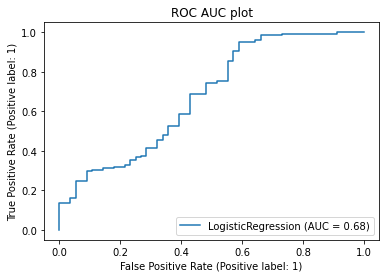

In [75]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr_cv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

### Saving the model

In [76]:
import joblib
joblib.dump(lr_cv.best_estimator_,'Loan prediction model.pkl')

['Loan prediction model.pkl']